In [1]:
# Python Crypto API Project


In [2]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline 
plt.style.use('fivethirtyeight')
import json
import time

In [ ]:
#Real time price

In [19]:
def price (symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
    .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [23]:
price('ETH',exchange='Gemini')

{'USD': 765.99}

In [24]:
#Daily Price

In [27]:
def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1,exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
    .format(symbol.upper(),comparison_symbol.upper(),limit,aggregate,allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['Timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [30]:
df = daily_price_historical('ETH','USD')
print('Max Length = %s' % len(df))
print('Max time = %s' % (df.Timestamp.max()- df.Timestamp.min()))
df.head()

Max Length = 1008
Max time = 1007 days 00:00:00


,close,high,low,open,time,volumefrom,volumeto,Timestamp
0,3.00,3.0,0.6747,0.6747,1438905600,123.93,371.79,2015-08-06 17:00:00
1,1.20,3.0,0.1500,3.0000,1438992000,2119.43,1438.16,2015-08-07 17:00:00
2,1.20,1.2,1.2000,1.2000,1439078400,0.00,0.00,2015-08-08 17:00:00
3,1.20,1.2,1.2000,1.2000,1439164800,0.00,0.00,2015-08-09 17:00:00
4,0.99,1.2,0.6504,1.2000,1439251200,9486.09,7419.73,2015-08-10 17:00:00


In [31]:
#plot


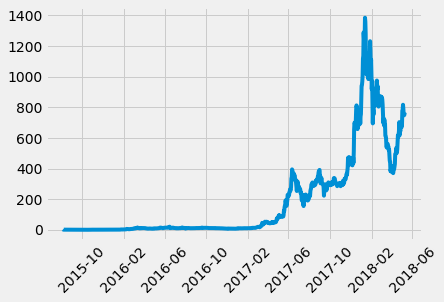

In [32]:
plt.plot(df['Timestamp'], df['close'])
plt.xticks(rotation=45)
plt.show()